### Import modules

In [1]:
# Standard imports
import pandas as pd
import numpy as np
import xtrack as xt
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import copy
import sys
import os

# Local imports
from diagram import workingDiagram
sys.path.insert(1, os.path.join(sys.path[0], '../tune_octupole'))
import analysis_functions

# Apply better style
sns.set_theme(style="whitegrid")
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
#sns.set(font='Adobe Devanagari')
sns.set_context("paper", font_scale=1, rc={"lines.linewidth": 0.5, "grid.linewidth": 0.3})


matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
# Not italized latex
matplotlib.rcParams['mathtext.default'] = 'regular'
matplotlib.rcParams["font.weight"] = "light"

%config InlineBackend.figure_format='svg'

### Load collider

In [2]:
# Define study
STUDY_NAME = "injection_oct_scan_for_experiment"
COLLIDER = "base_collider"
PARQUET_PATH = f"../../scans/{STUDY_NAME}/da.parquet"
CONF_MAD_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/config.yaml"
CONF_COLLIDER_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/xtrack_0000/config.yaml"

# Define study
collider = xt.Multiline.from_json(f"../../scans/{STUDY_NAME}/{COLLIDER}/xtrack_0000/collider.json")

Done loading line from dict.           
Done loading line from dict.           
Done loading line from dict.           
Done loading line from dict.           


In [3]:
collider.build_trackers()

Compiling ContextCpu kernels...


7a39cbcf9f0741c8ae90771761ec36b9.c:4389: warning: "_GNU_SOURCE" redefined
 #  define _GNU_SOURCE // enable GNU libc NAN extension if possible
 
In file included from 7a39cbcf9f0741c8ae90771761ec36b9.c:50:
/afs/cern.ch/work/c/cdroin/private/example_DA_study_dev/miniforge/include/python3.10/pyconfig.h:1621: note: this is the location of the previous definition
 #define _GNU_SOURCE 1
 


Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...


653d819f8c8c42c99860db5f55a103ed.c:4389: warning: "_GNU_SOURCE" redefined
 #  define _GNU_SOURCE // enable GNU libc NAN extension if possible
 
In file included from 653d819f8c8c42c99860db5f55a103ed.c:50:
/afs/cern.ch/work/c/cdroin/private/example_DA_study_dev/miniforge/include/python3.10/pyconfig.h:1621: note: this is the location of the previous definition
 #define _GNU_SOURCE 1
 


Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.


### Do FMA

In [4]:
octupoles = -50.0
phase_change = 1.0

collider.vars['i_oct_b1'] = octupoles
collider.vars['i_oct_b2'] = octupoles

collider.vars["phase_change.b1"] = phase_change
collider.vars["phase_change.b2"] = phase_change

fma = collider.lhcb1.get_fma(nemitt_x=2.5e-6, nemitt_y=2.5e-6, n_r = 25, n_theta = 25)

Tracking particles for fma...
Done tracking.
Computing FFT..
Done computing fma.


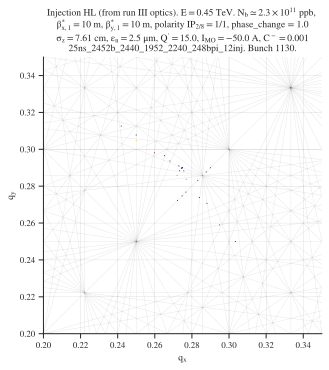

In [5]:
# Load configuration files
conf_mad = analysis_functions.load_config(CONF_MAD_PATH)['config_mad']
conf_collider = analysis_functions.load_config(CONF_COLLIDER_PATH)["config_collider"]


plt.figure( figsize=(5,5))
workingDiagram(order = 10, alpha=0.1)
fma.plot_fma(s = 0.1)
plt.grid(True)
plt.xlim(0.2, 0.35)
plt.ylim(0.2, 0.35)
plt.title(analysis_functions.get_title_from_conf(
                conf_mad,
                conf_collider,
                betx=10,
                bety=10,
                display_intensity=True,
                phase_knob=phase_change,
                octupoles=octupoles,
                LHC_version="Injection HL (from run III optics)",
            ))
plt.savefig(f"fma_oct_{octupoles}_phase_{phase_change}.png", dpi=300)
#plt.show()

### Reverse octupoles and do FMA

In [14]:
octupoles = 50.0
phase_change = 1.0

collider.vars['i_oct_b1'] = octupoles
collider.vars['i_oct_b2'] = octupoles

collider.vars["phase_change.b1"] = phase_change
collider.vars["phase_change.b2"] = phase_change

fma = collider.lhcb1.get_fma(nemitt_x=2.5e-6, nemitt_y=2.5e-6, n_r = 25, n_theta = 25)

Tracking particles for fma...
Done tracking.
Computing FFT..
Done computing fma.


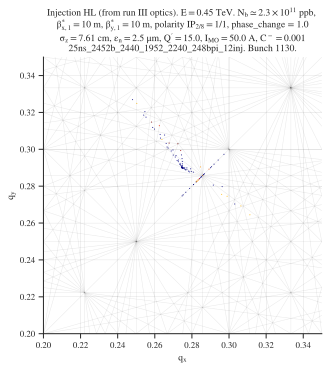

In [15]:
plt.figure( figsize=(5,5))
workingDiagram(order = 10, alpha=0.1)
fma.plot_fma(s = 0.1)
plt.grid(True)
plt.xlim(0.2, 0.35)
plt.ylim(0.2, 0.35)
plt.title(analysis_functions.get_title_from_conf(
                conf_mad,
                conf_collider,
                betx=10,
                bety=10,
                display_intensity=True,
                phase_knob=phase_change,
                octupoles=octupoles,
                LHC_version="Injection HL (from run III optics)",
            ))
plt.savefig(f"fma_oct_{octupoles}_phase_{phase_change}.png", dpi=300)
#plt.show()

### Deactivate phase knob and redo

In [16]:
octupoles = -50.0
phase_change = 0.0

collider.vars['i_oct_b1'] = octupoles
collider.vars['i_oct_b2'] = octupoles

collider.vars["phase_change.b1"] = phase_change
collider.vars["phase_change.b2"] = phase_change

fma = collider.lhcb1.get_fma(nemitt_x=2.5e-6, nemitt_y=2.5e-6, n_r = 25, n_theta = 25)

Tracking particles for fma...
Done tracking.
Computing FFT..
Done computing fma.


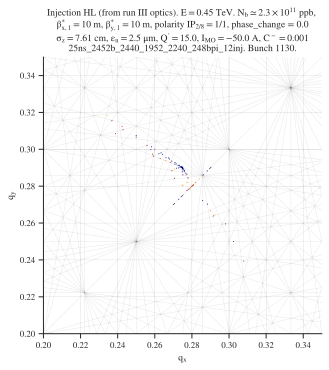

In [17]:
plt.figure( figsize=(5,5))
workingDiagram(order = 10, alpha=0.1)
fma.plot_fma(s = 0.1)
plt.grid(True)
plt.xlim(0.2, 0.35)
plt.ylim(0.2, 0.35)
plt.title(analysis_functions.get_title_from_conf(
                conf_mad,
                conf_collider,
                betx=10,
                bety=10,
                display_intensity=True,
                phase_knob=phase_change,
                octupoles=octupoles,
                LHC_version="Injection HL (from run III optics)",
            ))
#plt.show()
plt.savefig(f"fma_oct_{octupoles}_phase_{phase_change}.png", dpi=300)


In [18]:
octupoles = 50.0
phase_change = 0.0

collider.vars['i_oct_b1'] = octupoles
collider.vars['i_oct_b2'] = octupoles

collider.vars["phase_change.b1"] = phase_change
collider.vars["phase_change.b2"] = phase_change

fma = collider.lhcb1.get_fma(nemitt_x=2.5e-6, nemitt_y=2.5e-6, n_r = 25, n_theta = 25)

Tracking particles for fma...
Done tracking.
Computing FFT..
Done computing fma.


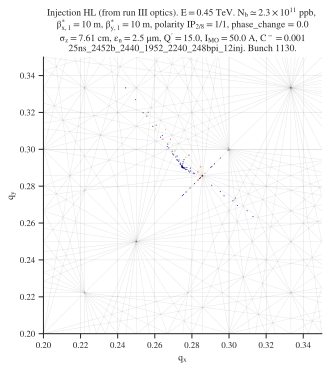

In [19]:
plt.figure( figsize=(5,5))
workingDiagram(order = 10, alpha=0.1)
fma.plot_fma(s = 0.1)
plt.grid(True)
plt.xlim(0.2, 0.35)
plt.ylim(0.2, 0.35)
plt.title(analysis_functions.get_title_from_conf(
                conf_mad,
                conf_collider,
                betx=10,
                bety=10,
                display_intensity=True,
                phase_knob=phase_change,
                octupoles=octupoles,
                LHC_version="Injection HL (from run III optics)",
            ))
#plt.show()
plt.savefig(f"fma_oct_{octupoles}_phase_{phase_change}.png", dpi=300)
